In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts
from arch.unitroot import ADF
from statsmodels.tsa import arima_model
import seaborn as sns
%matplotlib inline
sns.set()
pro = ts.pro_api()

获取数据

In [42]:
data = pro.query('daily',ts_code='600446.SH',start_date='20180615',end_date='20180817')
data.set_index('trade_date',inplace=True)
price = data['close'].reindex(pd.to_datetime(data.index)).sort_index()
price.head()

trade_date
2018-06-15    12.32
2018-06-19    11.06
2018-06-20    11.16
2018-06-21    10.04
2018-06-22    10.12
Name: close, dtype: float64

序列识别

In [43]:
price[-3:]

trade_date
2018-08-15    9.47
2018-08-16    9.42
2018-08-17    9.20
Name: close, dtype: float64

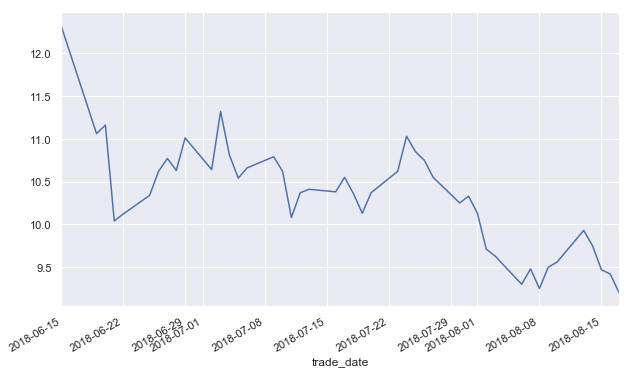

In [47]:
# 时序图
price.plot(figsize=(10,6))

In [48]:
# ADF检验
print(ADF(price[:-4]).summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.700
P-value                         0.004
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.61 (1%), -2.94 (5%), -2.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
# 白噪声检验
from statsmodels.tsa import stattools
ljunbox = stattools.q_stat(stattools.acf(price[:-4]),len(price[-4:]))
ljunbox[1][-1]

/Users/brianlee/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:410: RuntimeWarning: divide by zero encountered in true_divide
  np.cumsum((1. / (nobs - np.arange(1, len(x) + 1))) * x**2))


0.0

模型识别与估计

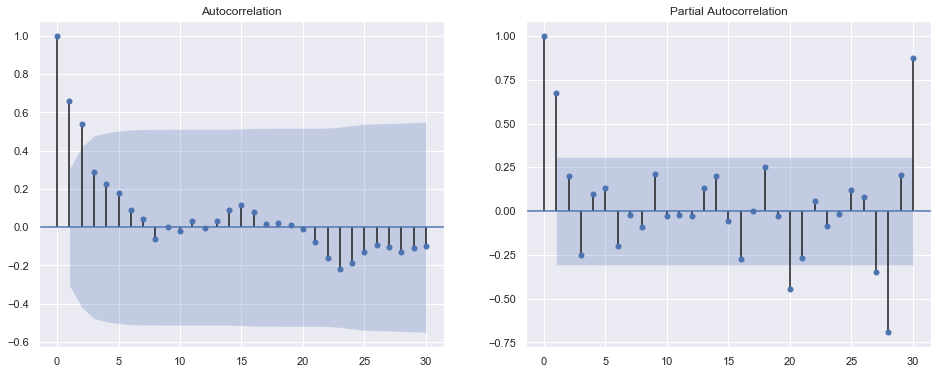

In [59]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(16,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
plot_acf(price[:-4],lags=30,ax=ax1)
plot_pacf(price[:-4],lags=30,ax=ax2);

In [60]:
arima1 = arima_model.ARIMA(price[:-4],order=(1,0,1)).fit()
arima1.summary()

/Users/brianlee/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                   41
Model:                     ARMA(1, 1)   Log Likelihood                 -18.099
Method:                       css-mle   S.D. of innovations              0.370
Date:                Thu, 18 Apr 2019   AIC                             44.199
Time:                        19:12:34   BIC                             51.053
Sample:                             0   HQIC                            46.695
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5925      0.420     25.192      0.000       9.768      11.417
ar.L1.close     0.8888      0.097      9.185      0.000       0.699       1.078
ma.L1.close    -0.0845      0.155     -0.544      0.590      -0.389       0.220
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1251           +0.0000j            1.1251            0.0000
MA.1           11.8306           +0.0000j           11.8306            0.0000
-----------------------------------------------------------------------------
"""

In [61]:
arima2 = arima_model.ARIMA(price[:-4],order=(1,0,2)).fit()
arima2.summary()

/Users/brianlee/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                   41
Model:                     ARMA(1, 2)   Log Likelihood                 -15.316
Method:                       css-mle   S.D. of innovations              0.344
Date:                Thu, 18 Apr 2019   AIC                             40.631
Time:                        19:13:50   BIC                             49.199
Sample:                             0   HQIC                            43.751
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5408      0.294     35.807      0.000       9.964      11.118
ar.L1.close     0.7334      0.167      4.398      0.000       0.407       1.060
ma.L1.close     0.0686      0.166      0.413      0.682      -0.257       0.394
ma.L2.close     0.4566      0.170      2.683      0.011       0.123       0.790
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3635           +0.0000j            1.3635            0.0000
MA.1           -0.0751           -1.4780j            1.4799           -0.2581
MA.2           -0.0751           +1.4780j            1.4799            0.2581
-----------------------------------------------------------------------------
"""